In [1]:
# Import Numpy & PyTorch
import numpy as np
import torch

In [18]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [25]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [26]:
y = (w**2) * x + b

In [27]:
y

tensor(53., grad_fn=<AddBackward0>)

In [28]:
y.backward()

In [29]:
w.grad

tensor(24.)

In [13]:
b.grad

tensor(2.)

In [30]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [31]:
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [32]:
x=torch.tensor(inputs)
y=torch.tensor(targets)

In [51]:
w=torch.rand(2,3,requires_grad=True)
b=torch.rand(2,requires_grad=True)

In [52]:
w.t()

tensor([[0.6793, 0.9624],
        [0.6948, 0.2059],
        [0.2668, 0.3453]], grad_fn=<TBackward>)

In [53]:
b

tensor([0.4570, 0.9252], requires_grad=True)

In [54]:
def model(x):
    return x @ w.t() + b

In [55]:
b

tensor([0.4570, 0.9252], requires_grad=True)

In [58]:
pred=model(x)

In [66]:
def mse(t1,t2):
    diff=t1-t2
    return( torch.sum(diff*diff)/diff.numel())

In [67]:
loss = mse(pred, y)

In [68]:
loss

tensor(2593.0884, grad_fn=<DivBackward0>)

In [79]:
for i in range(10000):
    preds = model(x)
    loss = mse(preds, y)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [80]:
loss

tensor(0.5402, grad_fn=<DivBackward0>)

In [81]:
w

tensor([[-0.4035,  0.8481,  0.6847],
        [-0.3091,  0.7945,  0.9047]], requires_grad=True)

In [83]:
preds-y

tensor([[ 1.2370,  0.4580],
        [ 1.1618, -0.4232],
        [-0.3186, -0.0657],
        [-0.9277, -0.0037],
        [-1.0680,  0.1618]], grad_fn=<SubBackward0>)

In [84]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [85]:
inputs

array([[ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.],
       [ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.],
       [ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.]], dtype=float32)

In [86]:
targets

array([[ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.],
       [ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.],
       [ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.]], dtype=float32)

In [87]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [88]:
from torch.utils.data import TensorDataset, DataLoader

In [89]:
train_ds = TensorDataset(inputs, targets)

In [90]:
train_ds

In [93]:
train_ds[0:6]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.]]))

In [94]:
batch_size = 3
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.]]), tensor([[ 22.,  37.],
         [103., 119.],
         [ 56.,  70.]])]

In [96]:
import torch.nn as nn
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2439,  0.4693, -0.0965],
        [ 0.2597,  0.5037, -0.0969]], requires_grad=True)
Parameter containing:
tensor([-0.1025,  0.0214], requires_grad=True)


In [97]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [98]:
import torch.nn.functional as F

In [99]:
loss_fn = F.mse_loss

In [100]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(1295.5713, grad_fn=<MseLossBackward>)


In [101]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))

In [102]:
fit(1000, model, loss_fn, opt)

Training loss:  tensor(0.5184, grad_fn=<MseLossBackward>)


In [103]:
torch.cuda.is_available()

False

In [104]:
X = torch.tensor(([2, 9], [1, 5], [3, 6]), dtype=torch.float) # 3 X 2 tensor
y = torch.tensor(([92], [100], [89]), dtype=torch.float) # 3 X 1 tensor
xPredicted = torch.tensor(([4, 8]), dtype=torch.float) # 1 X 2 tensor

In [114]:
X_max, _ = torch.max(X, 0)

In [115]:
X_max

tensor([3., 9.])

In [116]:
X

tensor([[2., 9.],
        [1., 5.],
        [3., 6.]])

In [123]:
X.max(0)
xPredicted_max, _ = torch.max(xPredicted, 0)

In [126]:
X = torch.div(X, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100

In [125]:
xPredicted_max

tensor(8.)

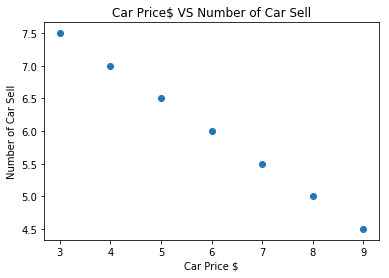

In [129]:
from torch.autograd import Variable

car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()
